In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Introduction
For a given sequence of observations $\{(x_i, y_i)\}^n_{i=1}$, we want to find some $f:\mathbb R\rightarrow \mathbb R$ s.t. $f(x_i) = y_i$ or in some cases $f(x_i) \approx y_i$. The approximation can be defined as Least square approximation $\arg\min_f\|f(x_i) - y_i\|$, where $f$ belongs to some group of functions (say we want to fit a line). 

#### Usages in Numerical Methods
 - Newton's method
 - Integrals: for some $f$ that is hard to find integral, find some polynomial $p\rightarrow^{p.w.} f$. 

###  Polynomial Interpolations
Given $\{(x_i,y_i)\}_{i=1}^n$, WTF $f(x) = \sum_{i=1}^n c_i \phi_i(x)$, i.e. 

$$
\underset{A}{\begin{bmatrix}
\phi_1(x_i)&...&\phi_n(x_1)\\
\vdots &\ddots&\vdots\\
\phi_1(x_n)&...&\phi_n(x_n)
\end{bmatrix}}
\underset{c}{\begin{bmatrix}
c_1\\\vdots\\c_n\end{bmatrix}}= 
\underset{y}{\begin{bmatrix}
y_1\\\vdots\\y_n\end{bmatrix}}
$$

If $A$ is nonsingular, then always a unique solution to $f(x_i) = y_i$

##### Monomial Basis
If we let $\phi_i(x) = x^{i-1}$, then $f(x) = p(x) = \sum_{i=0}^N c_i x^i$ s.t. $p(x_i) = y_i$ and we have 
$$A = \begin{bmatrix}
1&x_1&...&x_1^{n-1}\\
\vdots&\vdots &\ddots&\vdots\\
1&x_n&...&x_n^{n-1}
\end{bmatrix}=:\text{Vandermonde Matrix}$$
Note that $A$ is non-sigular if $x_i$'s are distinct. 

__Proposition__ Given $A$ is non-singular, then $Ac =0$ IFF $c=0$  

_proof_. Define $p(x_j) := \sum_{i=1}^n c_i x_j^{i-1} = 0$ for $j = 1,...,n$. $p(x)$ is a polynomial of degree $n-1$.  
By fundamental theorem of algebra, if at least one $c_i \neq 0$ then $p(x)$ has at most $n-1$ roots. 

#### Example
Find a quadratic $p(x) = c_1 + c_2 x + c_3 x^2$ s.t. $p(-2) = -27, p(0) = -1, p(1) = 0$
Then we construct $A = \begin{bmatrix} 1&(-2)^1&(-2)^2\\1&0&0^2\\1&1&1^2\end{bmatrix} = \begin{bmatrix} 1&-2&4\\1&0&0\\1&1&1\end{bmatrix}, y = \begin{bmatrix}-27\\-1\\0\end{bmatrix}$

In [29]:
x = np.array([-2, 0, 1])
y = np.array([-27, -1, 0])

def find_fit(x, y):
    A = np.empty((x.shape[0], x.shape[0]))
    for i in range(A.shape[0]):
        A[:, i] = x ** i
    c = np.linalg.solve(A, y)
    return c
c = find_fit(x, y)
print("y = " + " + ".join([str(int(round(c[i]))) + "x^" + str(i) for i in range(c.shape[0])]))

y = -1x^0 + 5x^1 + -4x^2


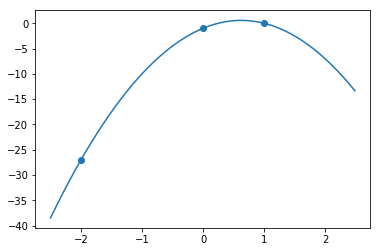

In [26]:
xl = np.arange(-2.5, 2.5, 0.01)
yl = sum([c[i] * (xl ** i) for i in range(c.shape[0])])
plt.plot(xl, yl)
plt.scatter(x, y);

#### Conditioning
Often Vandermonde Matrices are very badly conditioned. When $x_1\neq x_2$ but $x_1\approx x_2$, then first two rows of $A$ are almost identical, resulting close to singular and bad conditioning. 

#### Properties of Polynomials
 - easy differentiation and integral
 - efficient evaluation

We can evaluate by 

```python
p = c[0]
x_k = 1
for k in range(1, n):
    x_k *= x
    p += c[k] * x_k
```
 
 Or we can even improve by noticing that $p(x) = c_0 + c_1x + c_2x^2 = c_0 + (c_1 + x(c_2 + x))$

```python
p = c[n]
for k in range(n-1, 0, -1):
    p = c[k] + x * p
```

### Lagrange Form of the Interpolation Polynomial
WTF $p(x_i) = y_i$ for $i = 1, 2,...,n$ and $p$ has $n-1$ degree. $x_i$ are distinct. 

Define the Lagrange basis functions 
$$l_j(x) = \prod_{i=0, i\neq j}^n \frac{x-x_i}{x_j-x_i}$$
Note that $l_j(x_i) = \mathbb I(i=j)$
Then $p(x) = \sum_{j=1}^n l_j(x)y_j$

Note that for each $l(x)$, there are at most $n-1$ times of $x$ multiplied together, hence at most $n-1$ degree.

Consider $p(x_i) = \sum l_j(x)y_j$, because the indicator property of $l$, only $i_i(x_i) = 1$ and others are all 0, therefore, the result is $l_i(x) y_i + \sum_{j\neq i} l_j(x)x_j = y_i + \sum 0 =  y_i$

Given the same example $p(-2) = -27, p(0) = -1, p(1) = 0$

$$l_1(x) = \frac{(x)(x-1)}{(-2)(-3)} = \frac{x(x-1)}{6}$$
$$l_2(x) = \frac{(x+2)(x-1)}{(2)(-1)} = \frac{-(x+2)(x-1)}{2}$$
$$l_3(x) = \frac{(x+2)(x)}{(3)(1)} = \frac{(x+2)x}{3}$$
$$p(x) = \frac{x(x-1)}{6}(-27) + -\frac{(x+2)(x-1)}{2}(-1) + \frac{(x+2)x}{3}(0) = -4x^2 +5x - 1$$

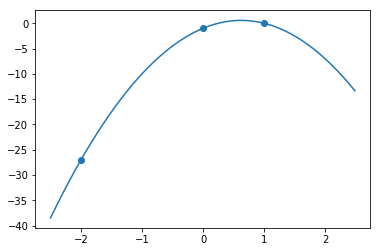

In [27]:
def indicator(x, j, x_array):
    prod = 1
    for i in range(len(x_array)):
        if i != j:
            prod *= ((x - x_array[i]) / (x_array[j] - x_array[i]))
    return prod

def p_lagrange(x, x_array, y_array):
    ret = 0
    for i in range(len(x_array)):
        ret += indicator(x, i, x_array) * y_array[i]
    return ret

yl = []
for e in xl:
    yl.append(p_lagrange(e, x, y))
    
plt.plot(xl, yl);
plt.scatter(x, y);

Consider the equation $p(x) = \sum l_i(x)c_i$, which the problem becomes the system of equations

$$\underset{A}{\begin{bmatrix}
l_1(x_1)&...&l_n(x_1)\\
\vdots &\ddots&\vdots\\
l_1(x_n)&...&l_n(x_n)
\end{bmatrix}}
\underset{c}{\begin{bmatrix}
c_1\\\vdots\\c_n\end{bmatrix}} 
= 
\underset{y}{\begin{bmatrix}
y_1\\\vdots\\y_n\end{bmatrix}}
$$
Now, consider the property of $l$, only the diagonal $l_i(x_i) = 1$, i.e. $A = I, c_i = y_i$. 

#### Computation
Need almost no time to construct, while it's hard to use. 

### Newton Form of Interpolation Polynomials

#### Basis Function
Let $\pi_1(x) = 0, \pi_j(x) = \prod_{i=1}^{j-1}(x-x_i)$ for $j \geq 2$

Let $p_j(x) = \sum_{i=1}^j c_i \pi_i(x)$. 

Assuming we have found $c_j$'s s.t. $p_j(x_i) = y_i$ for $i\in\{1,...,j\}$ and we want to find $c_{j+1}$ so that $p_{j+1}(x) := p_t(x) + c_{j+1}\pi_{j+1}(x)$ and $p_{j+1}(x_i) = y_i$ for $i\in \{1,...,j+1\}$

Consider such recurrence relationship, $\forall i < j+1, \pi_{j+1}(t_i) = 0$ (since one of $(x-x_i)$ in $\pi$ must be 0).  
So that 
$$y_{j+1} = p_{j+1}(x_{j+1}) = p_j(x_{j+1}) + c_{j+1}\pi_{j+1}(x_{j+1})\Rightarrow c_{j+1} = \frac{y_{j+1} - p_j(x_{j+1})}{\pi_{j+1}(x_{j+1})}$$

Define some $y$ such that the following relationship holds
$$c_j = y\{t_1,...,t_j\} = \frac{y\{t_2,...,t_j\} - y\{t_1,...,t_{j-1}\}}{t_j - t_1}$$

Define the divided difference table 

|       | $y[t_i]$       | $y[t_i, t_{i+1}]$                                 | $y[t_i, t_{i+1}, t_{i+2}]$                                       | $y[t_i, t_{i+1}, t_{i+2}, t_{i+3}]$                                             |
|-------|----------------|---------------------------------------------------|------------------------------------------------------------------|---------------------------------------------------------------------------------|
| $t_1$ | $y[t_1] = y_1$ | $y[t_1, t_2] = \frac{y[t_2] - y[t_1]}{t_2 - t_1}$ | $y[t_1, t_2, t_3] = \frac{y[t_2, t_3] - y[t_1, t_2]}{t_3 - t_1}$ | $y[t_1, t_2, t_3, t_4] = \frac{y[t_2, t_3, t_4] - y[t_1, t_2, t_3]}{t_4 - t_1}$ |
| $t_2$ | $y[t_2] = y_2$ | $y[t_2, t_3] = \frac{y[t_3] - y[t_2]}{t_3 - t_2}$ | $y[t_2, t_3, t_4] = \frac{y[t_3, t_4] - y[t_2, t_3]}{t_4 - t_2}$ |                                                                                 |
| $t_3$ | $y[t_3] = y_3$ | $y[t_3, t_4] = \frac{y[t_4] - y[t_3]}{t_4 - t_3}$ |                                                                  |                                                                                 |
| $t_4$ | $y[t_4] = y_4$ |                                                   |                                                                  |                                                                                 |

And we will use the first row to compute $c_j$'s. 

Such table needs around $n^2/2$ operations

Such divided difference table actually approximates the $(n+1)$th derivative. 
$$y[t_1,...,t_n] = \frac{y^{(n+1)}(\epsilon)}{(n+1)!}, \epsilon \text{ belongs to some interval contains all }t$$

#### Computation
$$p(x) = \sum_{i=1}^4 c_i \bigg[\prod_{j=1}^{i-1}(x-x_j)\bigg] = c_1 + (t-t_1)(c_2 + (t-t2)(c_3 + c_4(t-t_3)))$$
Therefore, for each iteration, $1$ adds and $2$ multiplications are performed. Where a total of $n-1$ iterations are needed. 

#### Error of Interpolations
Suppose $y_i = y(t_i)$ for some smooth function $y$, i.e. $y_i$ are coming out of some underlying function model $y$. We aim to measure $\|y-p\|_\infty$

__Claim__ 
$$y(t)-p(t) = \frac{y^{(n)}(\epsilon_t)}{n!}\prod_{i=1}^n (t-t_i)$$
where $\epsilon_t$ is in the smallest interval containing $t_1,...,t_n$

Recall __Rolle's Theorem__ Given continuous $\phi'(t). \phi(t_1) = \phi(t_2) = 0\Rightarrow \alpha \in (t_1, t_2). \phi'(\alpha) = 0$

_proof_. Fix $t$. Define $w(t) = \prod (t-t_i)$  
Suppose $t\in \{t_i\}$. Then $y_{t_i} - p(t_i) = 0\land \prod (t - t_i) = 0$ (one of it is 0).  
Suppose $t\not\in \{t_i\}$, define function 
$$\phi(s) := y(s)-p(s) - w(s)\frac{y(t)-p(t)}{w_t}$$
Then $\phi(t)=0$ and we have $n+1$ distinct places where $\phi(s)=0$, hence $n$ places where $\phi'(s) = 0$, ... $1$ place where $\phi^{(n)}(s) = 0$
Notice that 
$$\phi^{(n)}(s) = y^{(n)}(s) - p^{(n)}(s) - \frac{y(t)-p(t)}{w(t)}w^{(n)}(s)$$
However, $p$ is a polynomial of degree $n-1, p^{(n)}(s) = 0$  
$w(s) = \prod^n (s-t_i) = s^n + o(s^{n-1})\Rightarrow w^{(n)}(s) = n!$   
Therefore 
$$\phi^{(n)}(s) = y^{(n)}(s) - \frac{y(t)-p(t)}{w(t)}n!$$
Let $\phi^{(n)}(s) = 0, y(t)-p(t) = \frac{w(t)y^{(n)}(s)}{n!}$ as required 

Consider the Taylor expansion of $y$, with Taylor's remainder and centered at $t_1$, i.e. $y(t) = \sum^n \frac{y^{(i)}(t) (t-t_1)}{(n-1)!} +  \frac{y^{(i)}(\epsilon) (t-t_1)}{(n-1)!}$ and $p$ is now equal to the Taylor polynomial. 

### Polynomial Interpolations does not always converge
Consider __Runge's Function__ $y(t) = (1+25 t^2)$. Taken #n# evenly spaced points on $[-1,1]$ and interpolate $y(t)$ by a polynomial. However, $y(t)-p(t)$ does not converges. 

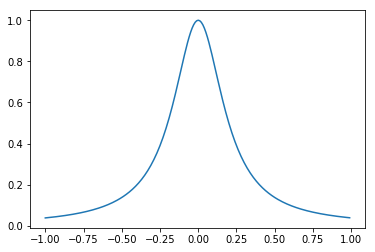

In [34]:
x = np.arange(-1, 1, 0.01)
y = 1/(1 + 25 * (x**2))
plt.plot(x, y);

## Piece-wise Polynomial Interpolation

If we take several polynomials and assign each to a domain.

### Piece-wise linear polynomials

Suppose we want to interpolate on $[a,b]$, partition $[a,b]$ into $x_0, ..., x_n$. Then, on each interval $[x_i, x_{i+1}]$, we have a linear polynomial $p_i(x) = \frac{y_{i+1} - y_i}{x_{i+1}-x_i}(x-x_i) + y_i, x\in[x_i, x_{i+1}]$

Define $y(x)$ be the underlying function, $s$ be the collection of all $p_i$, connected in order. Then 
$$\|y-s\|_\infty \leq \frac{h^2}{4} \max_{\epsilon\in[a,b]} \frac{|y''(\epsilon)|}{2} = \frac{h^2}{8} \max_{\epsilon\in[a,b]}|y''(\epsilon)|, h = |x_{i+1}-x_i|$$
